# Classification_Techniques_Decission_tree

Importing all tha necessary libraries

In [176]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
import matplotlib.pyplot as plt
import seaborn as sns

loading csv dataset;

In [11]:
df=pd.read_csv('loan_train.csv')

Observing the data in dataset 

In [12]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,541700,419600.0,26700000,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,233300,151600.0,9500000,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,303600,250400.0,15800000,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,400600,152600.0,16800000,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,1284100,1096800.0,34900000,360.0,1.0,Semiurban,N


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [14]:
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

We have to change the '3+' values by '3'

In [18]:
df['Dependents']=df['Dependents'].replace('3+', '3')

In [19]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,541700,419600.0,26700000,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,233300,151600.0,9500000,360.0,1.0,Urban,Y
7,Male,Yes,3,Graduate,No,303600,250400.0,15800000,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,400600,152600.0,16800000,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,1284100,1096800.0,34900000,360.0,1.0,Semiurban,N


Change the Null values by column mean values  

In [22]:
df.fillna(df.mean(axis=0), inplace=True)

C:\Users\gaura\AppData\Local\Temp\ipykernel_5076\2963836096.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(axis=0), inplace=True)


In [25]:
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   0
Credit_History         0
Area                   0
Status                 0
dtype: int64

Remove all the remaining null values

In [27]:
df=df.dropna()

Change tha Column datatype 

In [28]:
df['Dependents']=df['Dependents'].astype('int')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              554 non-null    object 
 1   Married             554 non-null    object 
 2   Dependents          554 non-null    int32  
 3   Education           554 non-null    object 
 4   Self_Employed       554 non-null    object 
 5   Applicant_Income    554 non-null    int64  
 6   Coapplicant_Income  554 non-null    float64
 7   Loan_Amount         554 non-null    int64  
 8   Term                554 non-null    float64
 9   Credit_History      554 non-null    float64
 10  Area                554 non-null    object 
 11  Status              554 non-null    object 
dtypes: float64(3), int32(1), int64(2), object(6)
memory usage: 54.1+ KB


Change tha Column datatype 

In [32]:
column=['Applicant_Income','Coapplicant_Income','Loan_Amount','Term','Credit_History']
for i in column:
    df[i]=df[i].astype('int')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              554 non-null    object
 1   Married             554 non-null    object
 2   Dependents          554 non-null    int32 
 3   Education           554 non-null    object
 4   Self_Employed       554 non-null    object
 5   Applicant_Income    554 non-null    int32 
 6   Coapplicant_Income  554 non-null    int32 
 7   Loan_Amount         554 non-null    int32 
 8   Term                554 non-null    int32 
 9   Credit_History      554 non-null    int32 
 10  Area                554 non-null    object
 11  Status              554 non-null    object
dtypes: int32(6), object(6)
memory usage: 43.3+ KB


Now make X,Y dataset for training and testing

In [34]:
x=df.drop('Credit_History',axis=1)
y=df.iloc[:,9]

Make the dummies for categorical column

In [35]:
cols=['Gender','Married','Education','Self_Employed','Area','Status']
dummies =[]
for col in cols:
    dummies.append(pd.get_dummies(x[col]))
tc_du=pd.concat(dummies,axis=1)
x=pd.concat((x,tc_du),axis=1)
x=x.drop(['Gender','Married','Education','Self_Employed','Area','Status'],axis=1)

In [36]:
x.head()

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Female,Male,No,Yes,Graduate,Not Graduate,No,Yes,Rural,Semiurban,Urban,N,Y
0,0,584900,0,15000000,360,0,1,1,0,1,0,1,0,0,0,1,0,1
1,1,458300,150800,12800000,360,0,1,0,1,1,0,1,0,1,0,0,1,0
2,0,300000,0,6600000,360,0,1,0,1,1,0,0,1,0,0,1,0,1
3,0,258300,235800,12000000,360,0,1,0,1,0,1,1,0,0,0,1,0,1
4,0,600000,0,14100000,360,0,1,1,0,1,0,1,0,0,0,1,0,1


In [37]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Credit_History, dtype: int32

Split the x and y dataset in to training and testing sets

In [164]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

Load the Decisionclassifier and fit the x_train,y_train in it

In [165]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf=clf.fit(x_train,y_train)

In [166]:
y_prd=clf.predict(x_test)

Make the prediction by the given user values

In [167]:
y_prd2=clf.predict([[1,500000,0,10000000,360,0,1,1,0,1,0,0,1,1,0,0,1,0]])

C:\Users\gaura\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [178]:
y_prd2

array([1])

See the Acciracy_score 

In [169]:
print(metrics.accuracy_score(y_test,y_prd))

0.8143712574850299


Make a dataframe for grapical Representation

In [170]:
df4=pd.DataFrame({'Actual':y_test,'Predictions':y_prd})

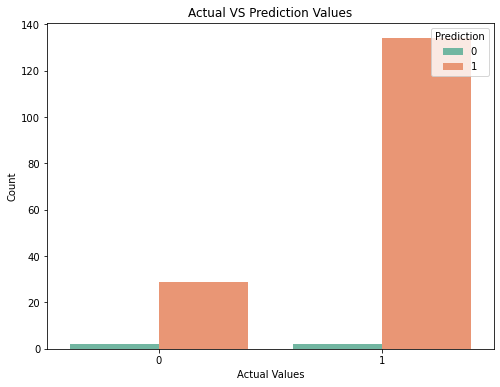

In [175]:
plt.figure(figsize=(8,6))
sns.countplot(data=df4,x='Actual',hue='Predictions',palette='Set2')
plt.xlabel("Actual Values")
plt.ylabel("Count")
plt.title("Actual VS Prediction Values")
plt.legend(title="Prediction",loc="upper right")
plt.show()